# Plot generated features

```
./feat_gen.py scenes/lamp_pole.yml --csv ../features.csv
./noise_gen.py ../features.csv --noises ../noises.csv
./train_separate_models.py ../features.csv ../noises.csv -c ../clf.pcl
```

In [3]:
import pickle
import itertools
import os

import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams.update({'axes.titlesize': 22, 'axes.labelsize': 18, 'legend.shadow': True, 
                            'legend.framealpha': 1.0, 'legend.fancybox': True, 'legend.fontsize':16,
                           'figure.figsize': (14.0, 10.0), 'xtick.labelsize' : 16, 'ytick.labelsize' : 16, 
                            'axes.grid':True, 'font.family': 'serif' })

## Load datasets

In [4]:
# Mapping of keys in csv file

cam_a_k = 'cam_a'         # Camera angle relative to the ground surface in range [0, -90] deg.
# 0 deg. - the camera is parallel to the ground surface; -90 deg. - camera points perpendicularly down
cam_y_k = 'y'             # Ground surface offset (negative camera height) relative to camera origin in range [-3, -n] m
w_k = 'width_est'         # Feature - estimated object width
h_k = 'height_est'        # Feature - estimated object height
ca_k = 'rw_ca_est'        # Feature - estimated object contour area
z_k = 'z_est'             # Feature - estimated object distance from a camera
o_class_k = 'o_class'     # Object class as an integer, where 0 is a noise class
o_name_k = 'o_name'       # Object name as a string

In [5]:
b_rec_k = ('x_px', 'y_px', 'w_px', 'h_px')
# target_df = pd.read_csv('../../data_synth_fe_refactored/single_angle_height_1.csv')  # The first test scenario, to check workability of the refactored code
# target_df = pd.read_csv('../../data_synth_fe_refactored/rw_scenes.csv')  # The height in range [-3, -5, -0.5], the cam angle is in range [-10, -31, -3]
# noises_df = pd.read_csv('../../data_synth_fe_refactored/n_rw_scenes.csv')

target_df = pd.read_csv('../features.csv') 
noises_df = pd.read_csv('../noises.csv')

pd_all_data = pd.concat([noises_df, target_df])  
print(pd_all_data.shape, pd_all_data[cam_a_k].unique(), pd_all_data[cam_y_k].unique())
print(pd_all_data.columns)
print(pd_all_data[o_name_k].unique())

(546981, 21) [-39.] [-3.32 -3.4 ]
Index(['width_est', 'height_est', 'rw_ca_est', 'z_est', 'y', 'cam_a',
       'o_class', 'z', 'x_est', 'x', 'ww', 'hh', 'o_name', 'ry', 'x_px',
       'y_px', 'w_px', 'h_px', 'c_ar_px', 'thr', 'dd'],
      dtype='object')
[nan 'car-3' 'standing-man' 'car-2' 'running-boy' 'woman-1' 'cyclist-1'
 'walking-man']


## Select features for a particular height and angle

In [6]:
dt_ = pd_all_data[(pd_all_data[cam_a_k] == -39) & (pd_all_data[cam_y_k] == -3.32)]

## Plot

<Figure size 7500x5000 with 0 Axes>

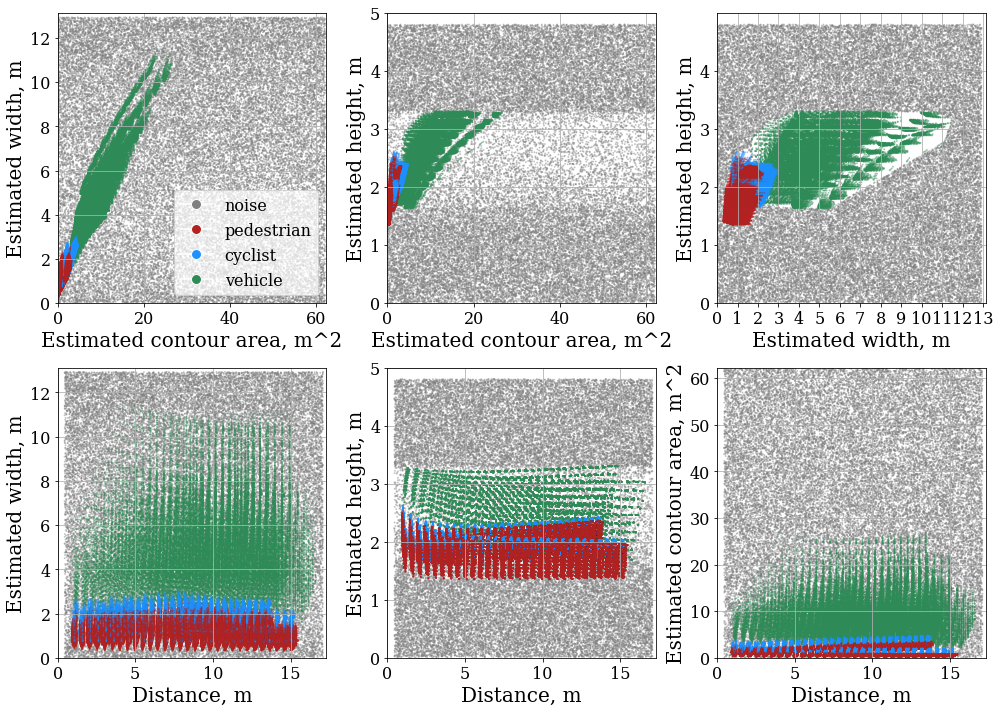

<Figure size 1008x720 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(15.0, 10.0), dpi=500)
fig, ax_lst = plt.subplots(2, 3, squeeze=True)


s = 1
alpha = 0.35
cm = ListedColormap(['grey', 'firebrick', 'orange', 'dodgerblue', 'seagreen'])
margin = 0.2

data_seq = ((dt_[ca_k], dt_[w_k]), (dt_[ca_k], dt_[h_k]), (dt_[w_k], dt_[h_k]), (dt_[z_k], dt_[w_k]), (dt_[z_k], dt_[h_k]), (dt_[z_k], dt_[ca_k]))
names_seq = (('Estimated contour area, m^2', 'Estimated width, m'), ('Estimated contour area, m^2', 'Estimated height, m'), ('Estimated width, m', 'Estimated height, m'),
            ('Distance, m', 'Estimated width, m'), ('Distance, m', 'Estimated height, m'), ('Distance, m', 'Estimated contour area, m^2'))
thr_seq = [[[0, x.max() + margin], [0, y.max() + margin]] for x, y in data_seq]

markersize = 10
legend_elements = [ plt.Line2D([0], [0], marker='o', color='w', label='noise', markerfacecolor='grey', markersize=markersize),
                    plt.Line2D([0], [0], marker='o', color='w', label='pedestrian', markerfacecolor='firebrick', markersize=markersize), 
                  plt.Line2D([0], [0], marker='o', color='w', label='cyclist', markerfacecolor='dodgerblue', markersize=markersize),
                  plt.Line2D([0], [0], marker='o', color='w', label='vehicle', markerfacecolor='seagreen', markersize=markersize)]

i = 0
try:
    for row in ax_lst:
        for col in row:
            col.scatter(data_seq[i][0], data_seq[i][1], c=dt_[o_class_k], cmap=cm, s=s, alpha=alpha, edgecolors='face')
            col.set_xlim(*thr_seq[i][0]), col.set_ylim(*thr_seq[i][1])
            if i == 0:
#                 col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
#                 col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(0, 10), col.set_ylim(0, 6)
                col.legend(handles=legend_elements, loc='lower right', framealpha=0.7, shadow=False)

            if i == 1:
#                 col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
#                 col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(0, 10), col.set_ylim(0, 3)
                pass
            if i == 2:
                col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
                col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(0, 6), col.set_ylim(0, 3)
                pass
            if i == 3:
#                 col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
#                 col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(9, 30), col.set_ylim(0, 6)
                pass
            if i == 4:
#                 col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
#                 col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(9, 30), col.set_ylim(0, 3)
                pass
            if i == 5:
#                 col.set_xticks(np.arange(0, max(thr_seq[i][0]), step=1))
#                 col.set_yticks(np.arange(0, max(thr_seq[i][1]), step=1))
                #col.set_xlim(9, 30), col.set_ylim(0, 10)
                pass
                
            fontsize = 20    
#                 col.plot(cnt_data[hull.vertices,0], cnt_data[hull.vertices,1], 'r--', lw=2)
            col.set_xlabel(names_seq[i][0], fontsize=fontsize), col.set_ylabel(names_seq[i][1], fontsize=fontsize)
            i += 1
except IndexError:
    pass


plt.tight_layout()
plt.show()
plt.clf()

In [72]:
import pickle
all_classifiers = pickle.load(open('../clf.pcl', "rb"))

In [73]:
print(all_classifiers)

{-3.32: {-39.0: LogisticRegression(C=3, n_jobs=-1, solver='newton-cg', verbose=1)}, -3.4: {-39.0: LogisticRegression(C=3, n_jobs=-1, solver='newton-cg', verbose=1)}, 'poly': PolynomialFeatures()}


In [74]:
poly = all_classifiers['poly']
clf = all_classifiers[-3.32][-39.0]

In [93]:
# feature_vector = [[1, 2, 10, 1.65]]
feature_vector = [[4, 2.5, 10, 6]]

poly_features = poly.transform(feature_vector)
o_prob = clf.predict_proba(poly_features)
o_class = clf.predict(poly_features)

o_prob, o_class

(array([[7.90835858e-04, 1.08134273e-14, 1.25694632e-04, 9.99083470e-01]]),
 array([3]))

In [92]:
pd_all_data[(pd_all_data[o_class_k] == 3)]

,width_est,height_est,rw_ca_est,z_est,y,cam_a,o_class,z,x_est,x,...,hh,o_name,ry,x_px,y_px,w_px,h_px,c_ar_px,thr,dd
0,3.79,1.88,4.747,8.49,-3.32,-39.0,3,7.76,-11.59,-8.0,...,1.5,car-3,0.0,18.0,149.0,195.0,110.0,14304.5,1.0,3.73
1,4.03,2.15,6.628,7.87,-3.32,-39.0,3,7.76,-11.40,-8.0,...,1.5,car-3,0.0,6.0,137.0,220.0,135.0,22722.5,26.0,3.73
2,3.68,1.86,4.611,8.96,-3.32,-39.0,3,8.24,-11.49,-8.0,...,1.5,car-3,0.0,41.0,145.0,182.0,105.0,12851.5,1.0,3.73
3,3.95,2.14,6.541,8.29,-3.32,-39.0,3,8.24,-11.29,-8.0,...,1.5,car-3,0.0,29.0,133.0,207.0,130.0,20834.0,26.0,3.73
4,3.60,1.85,4.478,9.42,-3.32,-39.0,3,8.72,-11.38,-8.0,...,1.5,car-3,0.0,62.0,141.0,171.0,101.0,11614.5,1.0,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261390,8.66,3.29,21.521,12.64,-3.40,-39.0,3,14.03,-1.04,8.0,...,3.0,car-3,90.0,641.0,44.0,324.0,158.0,38637.0,26.0,7.46
261391,8.62,3.06,17.500,14.42,-3.40,-39.0,3,14.52,-0.40,8.0,...,3.0,car-3,90.0,649.0,55.0,289.0,130.0,24950.5,1.0,7.46
261392,8.60,3.31,21.449,13.03,-3.40,-39.0,3,14.52,-1.03,8.0,...,3.0,car-3,90.0,637.0,43.0,314.0,155.0,36696.5,26.0,7.46
261393,8.58,3.05,17.374,14.90,-3.40,-39.0,3,15.00,-0.36,8.0,...,3.0,car-3,90.0,646.0,55.0,280.0,126.0,23443.5,1.0,7.46
